# Isolation Forests

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data/entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [3]:
# Data Prep
X = df.iloc[:,1:]
X.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [4]:
X.shape

(150, 3)

In [5]:
from sklearn.ensemble import IsolationForest

In [6]:
model = IsolationForest(contamination=0.02)

In [7]:
model.fit(X)

IsolationForest(contamination=0.02)

In [8]:
df['anomaly_scores'] = model.decision_function(X)
df.sort_values('anomaly_scores').head()

,name,books,tv_shows,video_games,anomaly_scores
110,Octavia,5.0,5.7,7.9,-0.019831
29,Clementine,6.2,5.4,7.2,-0.002869
147,Zara,5.5,5.7,7.7,-0.002580
15,Avery,1.0,6.6,5.7,0.000053
37,Elena,0.8,3.4,4.5,0.004071


In [9]:
df['anomaly'] = model.predict(X)
df.sort_values('anomaly_scores').head(10) 

,name,books,tv_shows,video_games,anomaly_scores,anomaly
110,Octavia,5.0,5.7,7.9,-0.019831,-1
29,Clementine,6.2,5.4,7.2,-0.002869,-1
147,Zara,5.5,5.7,7.7,-0.002580,-1
15,Avery,1.0,6.6,5.7,0.000053,1
37,Elena,0.8,3.4,4.5,0.004071,1
42,Elizabeth,0.0,4.5,4.3,0.025633,1
19,Bianca,5.8,3.9,7.7,0.026983,1
58,Hailey,2.5,3.0,5.0,0.056061,1
148,Zoe,0.0,6.1,5.2,0.057747,1
129,Sofia,0.5,6.0,5.8,0.069374,1


## Visualizing Anomalies

In [10]:
import seaborn as sns

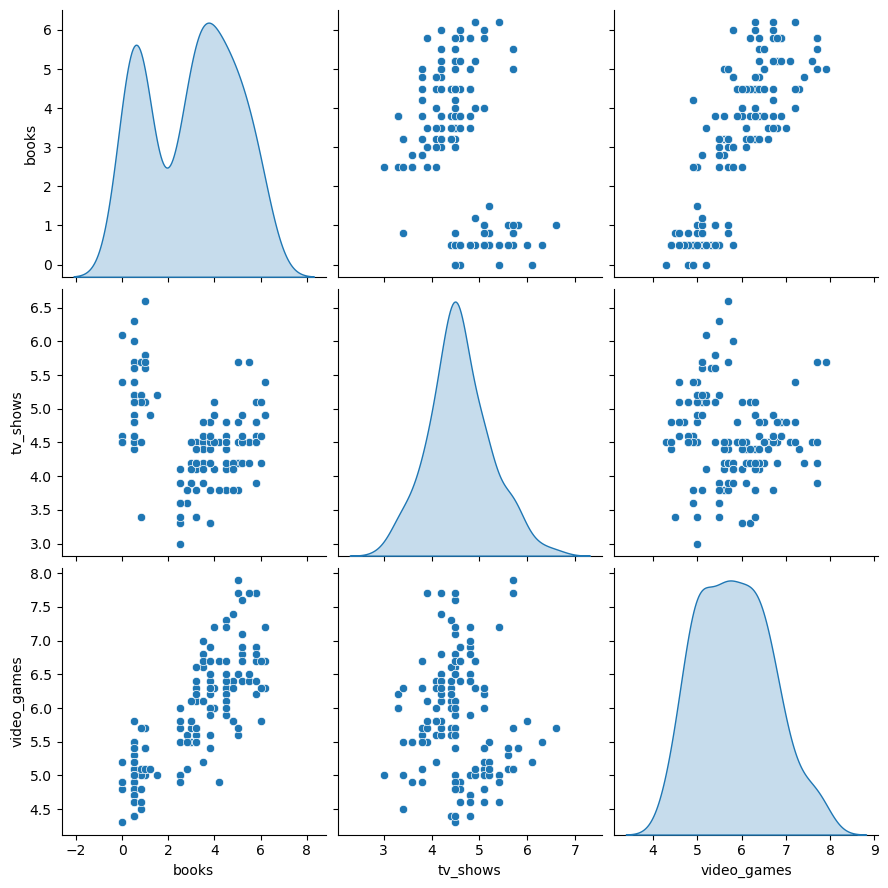

In [11]:
sns.pairplot(X, diag_kind='kde', height=3);

In [12]:
X.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [13]:
df.head()

,name,books,tv_shows,video_games,anomaly_scores,anomaly
0,Aaliyah,0.5,4.6,4.9,0.202399,1
1,Abigail,0.0,4.5,4.8,0.130108,1
2,Addison,0.5,4.5,5.0,0.189217,1
3,Adeline,3.5,4.5,6.6,0.211344,1
4,Alana,2.8,3.8,5.6,0.177496,1


In [14]:
df.iloc[:,1:].drop(columns=['anomaly_scores'])

,books,tv_shows,video_games,anomaly
0,0.5,4.6,4.9,1
1,0.0,4.5,4.8,1
2,0.5,4.5,5.0,1
3,3.5,4.5,6.6,1
4,2.8,3.8,5.6,1
...,...,...,...,...
145,5.2,4.6,6.9,1
146,6.0,4.6,6.7,1
147,5.5,5.7,7.7,-1
148,0.0,6.1,5.2,1


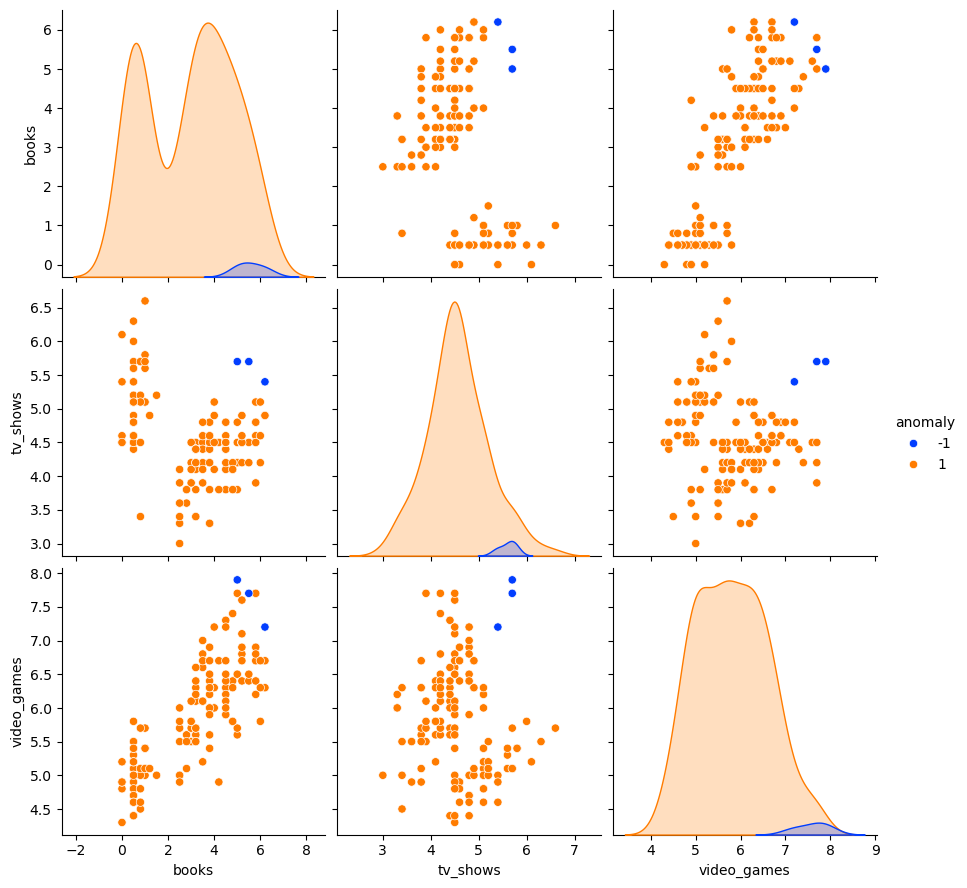

In [15]:
sns.pairplot(df.iloc[:,1:].drop(columns=['anomaly_scores']), 
             hue='anomaly', # Color depends on anomaly column
             palette='bright',# Default colors are horrible so we set the colors
             diag_kind='kde', 
             height=3);

## Tuning and Interpreting Isolation Forests

In [16]:
model5 = IsolationForest(contamination=0.05)

In [17]:
model5.fit(X)

IsolationForest(contamination=0.05)

In [18]:
df['anomaly_scores5'] = model5.decision_function(X)
df.sort_values('anomaly_scores5').head(10)

,name,books,tv_shows,video_games,anomaly_scores,anomaly,anomaly_scores5
15,Avery,1.0,6.6,5.7,0.000053,1,-0.055524
148,Zoe,0.0,6.1,5.2,0.057747,1,-0.040546
110,Octavia,5.0,5.7,7.9,-0.019831,-1,-0.036434
37,Elena,0.8,3.4,4.5,0.004071,1,-0.031044
147,Zara,5.5,5.7,7.7,-0.002580,-1,-0.012651
58,Hailey,2.5,3.0,5.0,0.056061,1,-0.011797
29,Clementine,6.2,5.4,7.2,-0.002869,-1,-0.007332
42,Elizabeth,0.0,4.5,4.3,0.025633,1,-0.003362
109,Nora,0.5,6.3,5.5,0.089174,1,0.004109
129,Sofia,0.5,6.0,5.8,0.069374,1,0.012913


In [19]:
df['anomaly5'] = model5.predict(X)
df.sort_values('anomaly_scores5').head(10) 

,name,books,tv_shows,video_games,anomaly_scores,anomaly,anomaly_scores5,anomaly5
15,Avery,1.0,6.6,5.7,0.000053,1,-0.055524,-1
148,Zoe,0.0,6.1,5.2,0.057747,1,-0.040546,-1
110,Octavia,5.0,5.7,7.9,-0.019831,-1,-0.036434,-1
37,Elena,0.8,3.4,4.5,0.004071,1,-0.031044,-1
147,Zara,5.5,5.7,7.7,-0.002580,-1,-0.012651,-1
58,Hailey,2.5,3.0,5.0,0.056061,1,-0.011797,-1
29,Clementine,6.2,5.4,7.2,-0.002869,-1,-0.007332,-1
42,Elizabeth,0.0,4.5,4.3,0.025633,1,-0.003362,-1
109,Nora,0.5,6.3,5.5,0.089174,1,0.004109,1
129,Sofia,0.5,6.0,5.8,0.069374,1,0.012913,1


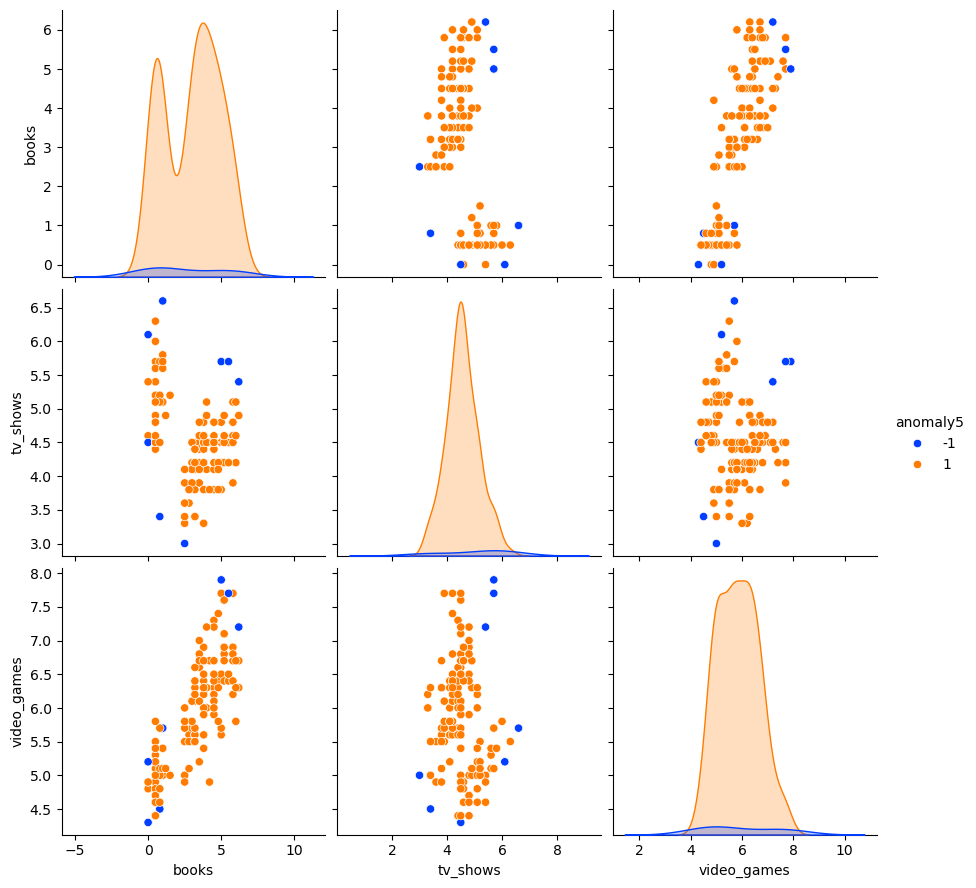

In [20]:
sns.pairplot(df.iloc[:,1:].drop(columns=['anomaly_scores', 'anomaly', 'anomaly_scores5']), 
             hue='anomaly5', # Color depends on anomaly column
             palette='bright',# Default colors are horrible so we set the colors
             diag_kind='kde', 
             height=3);

## DBSCAN for anomaly detection

In [21]:
X.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [22]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []
    
    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1,2,.1)
    min_samples_values = np.arange(2,10,1)
    
    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_
    
            # Count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)
    
            # calculate the silhouette score
            if n_clusters > 1: # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None
    
            results.append([eps, min_samples, n_clusters, n_noise, silhouette])
    
    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=['Eps', 'Min Samples', 'Number of Clusters', 'Number of Noise Points', 'Silhouette Score'])
    
    return dbscan_results

In [23]:
# view the results on the original data
dbscan_results = tune_dbscan(X)
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,12,124,-0.438782
1,0.1,3,2,144,-0.483479
2,0.1,4,0,150,NaN
3,0.1,5,0,150,NaN
4,0.1,6,0,150,NaN


In [26]:
# top silhouette scores
dbscan_results.sort_values('Silhouette Score', ascending=False).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
109,1.4,7,2,0,0.628673
107,1.4,5,2,0,0.628673
106,1.4,4,2,0,0.628673
105,1.4,3,2,0,0.628673


In [28]:
(dbscan_results.sort_values('Silhouette Score', ascending=False)
                 .groupby('Silhouette Score')
                 .head(1)).head(10)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
76,1.0,6,2,2,0.550831
79,1.0,9,2,3,0.528540
72,1.0,2,2,1,0.515323
57,0.8,3,2,4,0.497686
62,0.8,8,2,5,0.482653
43,0.6,5,2,12,0.480329
52,0.7,6,2,9,0.476795
41,0.6,3,2,11,0.476287
63,0.8,9,2,6,0.471959


In [29]:
dbscan = DBSCAN(eps=1, min_samples=6)

In [30]:
dbscan.fit(X)

DBSCAN(eps=1, min_samples=6)

In [31]:
dbscan.labels_

array([ 0,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,
        1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  0,
        1,  1,  1,  1,  0,  1,  0,  0, -1,  1,  0,  0,  0,  1,  1,  0,  1,
        1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0],
      dtype=int64)

In [32]:
df.head()

,name,books,tv_shows,video_games,anomaly_scores,anomaly,anomaly_scores5,anomaly5
0,Aaliyah,0.5,4.6,4.9,0.202399,1,0.175955,1
1,Abigail,0.0,4.5,4.8,0.130108,1,0.076493,1
2,Addison,0.5,4.5,5.0,0.189217,1,0.167757,1
3,Adeline,3.5,4.5,6.6,0.211344,1,0.188382,1
4,Alana,2.8,3.8,5.6,0.177496,1,0.145682,1


In [33]:
df['anomaly_dbscan'] = dbscan.labels_
df.head()

,name,books,tv_shows,video_games,anomaly_scores,anomaly,anomaly_scores5,anomaly5,anomaly_dbscan
0,Aaliyah,0.5,4.6,4.9,0.202399,1,0.175955,1,0
1,Abigail,0.0,4.5,4.8,0.130108,1,0.076493,1,0
2,Addison,0.5,4.5,5.0,0.189217,1,0.167757,1,0
3,Adeline,3.5,4.5,6.6,0.211344,1,0.188382,1,1
4,Alana,2.8,3.8,5.6,0.177496,1,0.145682,1,1


In [34]:
df[df['anomaly_dbscan'] == -1]

,name,books,tv_shows,video_games,anomaly_scores,anomaly,anomaly_scores5,anomaly5,anomaly_dbscan
37,Elena,0.8,3.4,4.5,0.004071,1,-0.031044,-1,-1
110,Octavia,5.0,5.7,7.9,-0.019831,-1,-0.036434,-1,-1


In [ ]:
sns.pairplot(df['books', 'tv_shows', 'video_games', 'anomaly_dbscan'], 
             hue='anomaly_dbscan', # Color depends on anomaly column
             palette='bright',# Default colors are horrible so we set the colors
             diag_kind='kde', 
             height=3);